In [2]:
import numpy as np 
import pandas as pd 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

# from jupyterthemes import jtplot
# jtplot.style(theme='onedork')

In [73]:
!jt -r

Reset css and font defaults in:
C:\Users\EVAN\.jupyter\custom &
C:\Users\EVAN\AppData\Roaming\jupyter\nbextensions


In [105]:
df_credit = pd.read_csv('Csv_Files/default_sample.csv')

In [106]:
df_credit

,age,amount_repaid,amount_spent_next1month,cash_rebate,cash_rebate_amount,credit_rep,credit_rep_plus_moral_rel,credit_rep_version,creditlimit,crowding_out_exp,...,weight,prediction,high_credit_risk,low_credit_risk,religious_province,religious_province_moral,high_credit_risk_50,high_credit_risk_75,high_credit_risk_90,high_credit_risk_95
0,40.250,484000,0,0,nan,1,0,2.000,10.000,0,...,1.000,0.055,0,1,1,nan,1,0,0,0
1,56.000,0,0,0,nan,0,0,nan,10.000,0,...,1.000,0.077,0,1,1,0.000,1,1,0,0
2,26.333,0,1745370,0,nan,0,0,nan,10.000,0,...,1.000,0.058,0,1,1,1.000,1,0,0,0
3,32.333,1410000,1040000,0,nan,0,0,nan,10.000,0,...,1.000,0.061,0,1,1,1.000,1,0,0,0
4,41.000,600000,0,0,nan,1,0,2.000,10.000,0,...,1.000,0.056,0,1,1,nan,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6974,46.917,0,0,0,nan,0,0,nan,10.000,0,...,1.000,0.078,0,1,1,0.000,1,1,0,0
6975,41.917,0,0,0,nan,0,0,nan,10.000,0,...,1.000,0.098,0,1,1,nan,1,1,0,0
6976,52.417,0,7995000,0,nan,0,0,nan,40.000,0,...,1.000,0.094,0,1,1,0.000,1,1,0,0
6977,34.000,1100000,1025000,0,nan,0,0,nan,8.000,0,...,1.000,0.158,1,0,1,1.000,1,1,1,1


In [107]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               6979 non-null   float64
 1   amount_repaid                     6979 non-null   int64  
 2   amount_spent_next1month           6979 non-null   int64  
 3   cash_rebate                       6979 non-null   int64  
 4   cash_rebate_amount                0 non-null      float64
 5   credit_rep                        6979 non-null   int64  
 6   credit_rep_plus_moral_rel         6979 non-null   int64  
 7   credit_rep_version                2000 non-null   float64
 8   creditlimit                       6979 non-null   float64
 9   crowding_out_exp                  6979 non-null   int64  
 10  ctrl                              6979 non-null   int64  
 11  debt_to_income                    2979 non-null   float64
 12  debt_t

In [108]:
df_credit.describe()

,age,amount_repaid,amount_spent_next1month,cash_rebate,cash_rebate_amount,credit_rep,credit_rep_plus_moral_rel,credit_rep_version,creditlimit,crowding_out_exp,...,weight,prediction,high_credit_risk,low_credit_risk,religious_province,religious_province_moral,high_credit_risk_50,high_credit_risk_75,high_credit_risk_90,high_credit_risk_95
count,6979.000,6979.000,6979.000,6979.000,0.000,6979.000,6979.000,2000.000,6979.000,6979.000,...,6979.000,6979.000,6979.000,6979.000,6979.000,2979.000,6979.000,6979.000,6979.000,6979.000
mean,42.045,672629.936,1129220.383,0.000,nan,0.287,0.000,1.500,13.619,0.000,...,1.121,0.054,0.103,0.897,0.376,0.122,0.507,0.254,0.103,0.050
std,9.070,1959769.787,3238733.487,0.000,nan,0.452,0.000,0.500,9.414,0.000,...,0.625,0.039,0.304,0.304,0.484,0.328,0.500,0.435,0.304,0.218
min,22.167,0.000,0.000,0.000,nan,0.000,0.000,1.000,4.000,0.000,...,1.000,-0.052,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,35.167,0.000,0.000,0.000,nan,0.000,0.000,1.000,10.000,0.000,...,1.000,0.029,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,41.667,0.000,0.000,0.000,nan,0.000,0.000,1.500,10.000,0.000,...,1.000,0.050,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000
75%,48.375,800000.000,1000000.000,0.000,nan,1.000,0.000,2.000,15.000,0.000,...,1.000,0.074,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000
max,91.667,40013500.000,78747592.000,0.000,nan,1.000,0.000,2.000,75.000,0.000,...,4.911,0.537,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [109]:
# profile = ProfileReport(df_credit, title='Credit Risk Analysis', explorative=True)
# profile.to_file('output.html')

In [110]:
print("all_data size is : {}".format(df_credit.shape))

all_data size is : (6979, 72)


# Feature Engineering

In [111]:
all_data_na = (df_credit.isnull().sum() / len(df_credit)) * 100
# all_data_na
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(72)

,Missing Ratio
cash_rebate_amount,100.000
time_lag_first_moral,100.000
treatment_repeated,100.000
treatment_wave4,98.682
treatment_wave6,98.195
ctrl_extra_weight,96.303
treatment_wave5,94.297
savings_15,86.961
savings_reduced,86.961
savings_18,86.961


Text(0.5, 1.0, 'Percent missing data by feature')

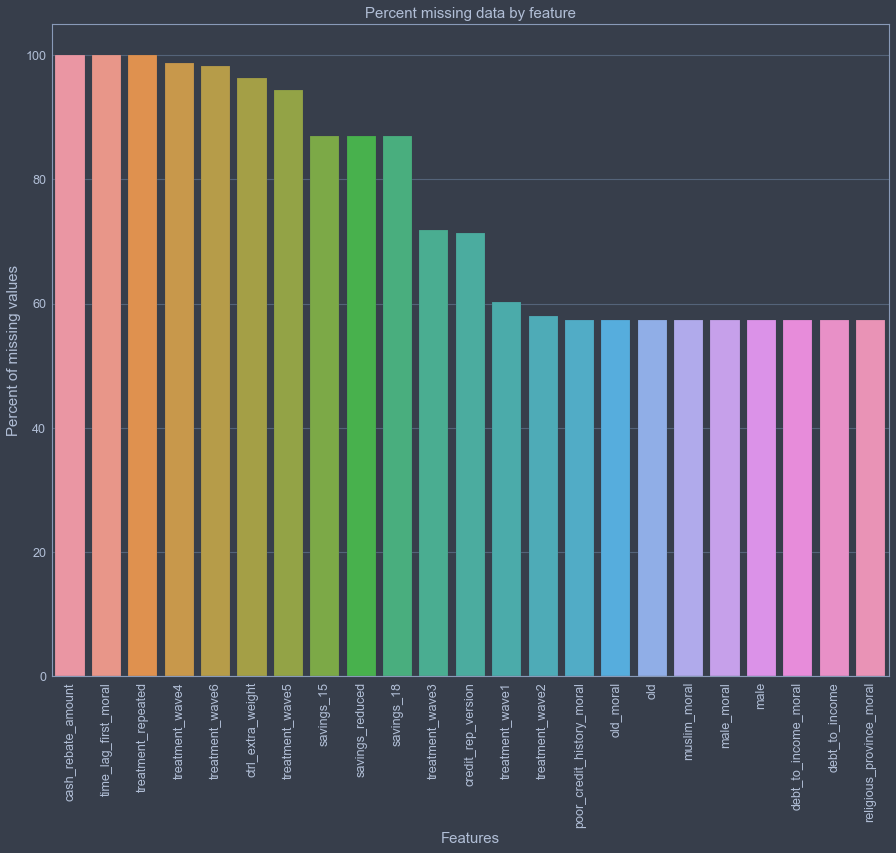

In [112]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [113]:
missing_data.index

Index(['cash_rebate_amount', 'time_lag_first_moral', 'treatment_repeated',
       'treatment_wave4', 'treatment_wave6', 'ctrl_extra_weight',
       'treatment_wave5', 'savings_15', 'savings_reduced', 'savings_18',
       'treatment_wave3', 'credit_rep_version', 'treatment_wave1',
       'treatment_wave2', 'poor_credit_history_moral', 'old_moral', 'old',
       'muslim_moral', 'male_moral', 'male', 'debt_to_income_moral',
       'debt_to_income', 'religious_province_moral'],
      dtype='object')

In [114]:
df_credit = df_credit.drop(['cash_rebate_amount', 'time_lag_first_moral', 'treatment_repeated',
       'treatment_wave4', 'treatment_wave6', 'ctrl_extra_weight',
       'treatment_wave5', 'savings_15', 'savings_reduced', 'savings_18',
       'treatment_wave3', 'credit_rep_version', 'treatment_wave1',
       'treatment_wave2', 'poor_credit_history_moral', 'old_moral', 'old', 
       'muslim_moral', 'male_moral', 'male', 'debt_to_income_moral',
       'debt_to_income', 'religious_province_moral',
        'muslim', 
        # 'late_2016', 'p_usage_next1month', 'amount_spent_next1month',
        # 'province_name'
       ],1) 

In [115]:
df_credit = df_credit.drop(['high_credit_risk_95','high_credit_risk_90','high_credit_risk_75','high_credit_risk_50',
                            'religious_province',
                            # 'province',
                            'wave','prediction','weight', #prediction or high/low risk
                            'type_obs', 'ctrl', #'treatment',
                            'repaid_twice_min', 'sample_before', 'religious_plac',
                            'moral_first','moral_rel', #mirip dengan moral
                            # 'creditlimit',
                            'outstanding' #same as min_payment
                           ],1)

In [116]:
#constant
df_credit = df_credit.drop(['cash_rebate','credit_rep_plus_moral_rel','crowding_out_exp','crowding_out_exp','main_exp',
                            'moral_imp','moral_non','moral_repeated','simple_rem_plus_due_date_message','default_sample',
                            'savings_account','followup_exp'
                           ],1)

In [117]:
df_credit['jk'] = df_credit['female'].apply(lambda x: 'Perempuan' if x == 1 else 'Laki')

In [118]:
df_credit = df_credit.drop(['female'],1)
df_credit = df_credit.drop(['randomcardnumber'],1)
df_credit = df_credit.drop(['low_credit_risk'],1)

In [119]:
df_credit.dtypes

age                        float64
amount_repaid                int64
amount_spent_next1month      int64
credit_rep                   int64
creditlimit                float64
default                      int64
delinquent                   int64
income                     float64
late_2016                    int64
min_payment                  int64
moral_all                    int64
p_usage_next1month           int64
poor_credit_history          int64
province                     int64
province_name               object
simple_rem                   int64
treatment                   object
high_credit_risk             int64
jk                          object
dtype: object

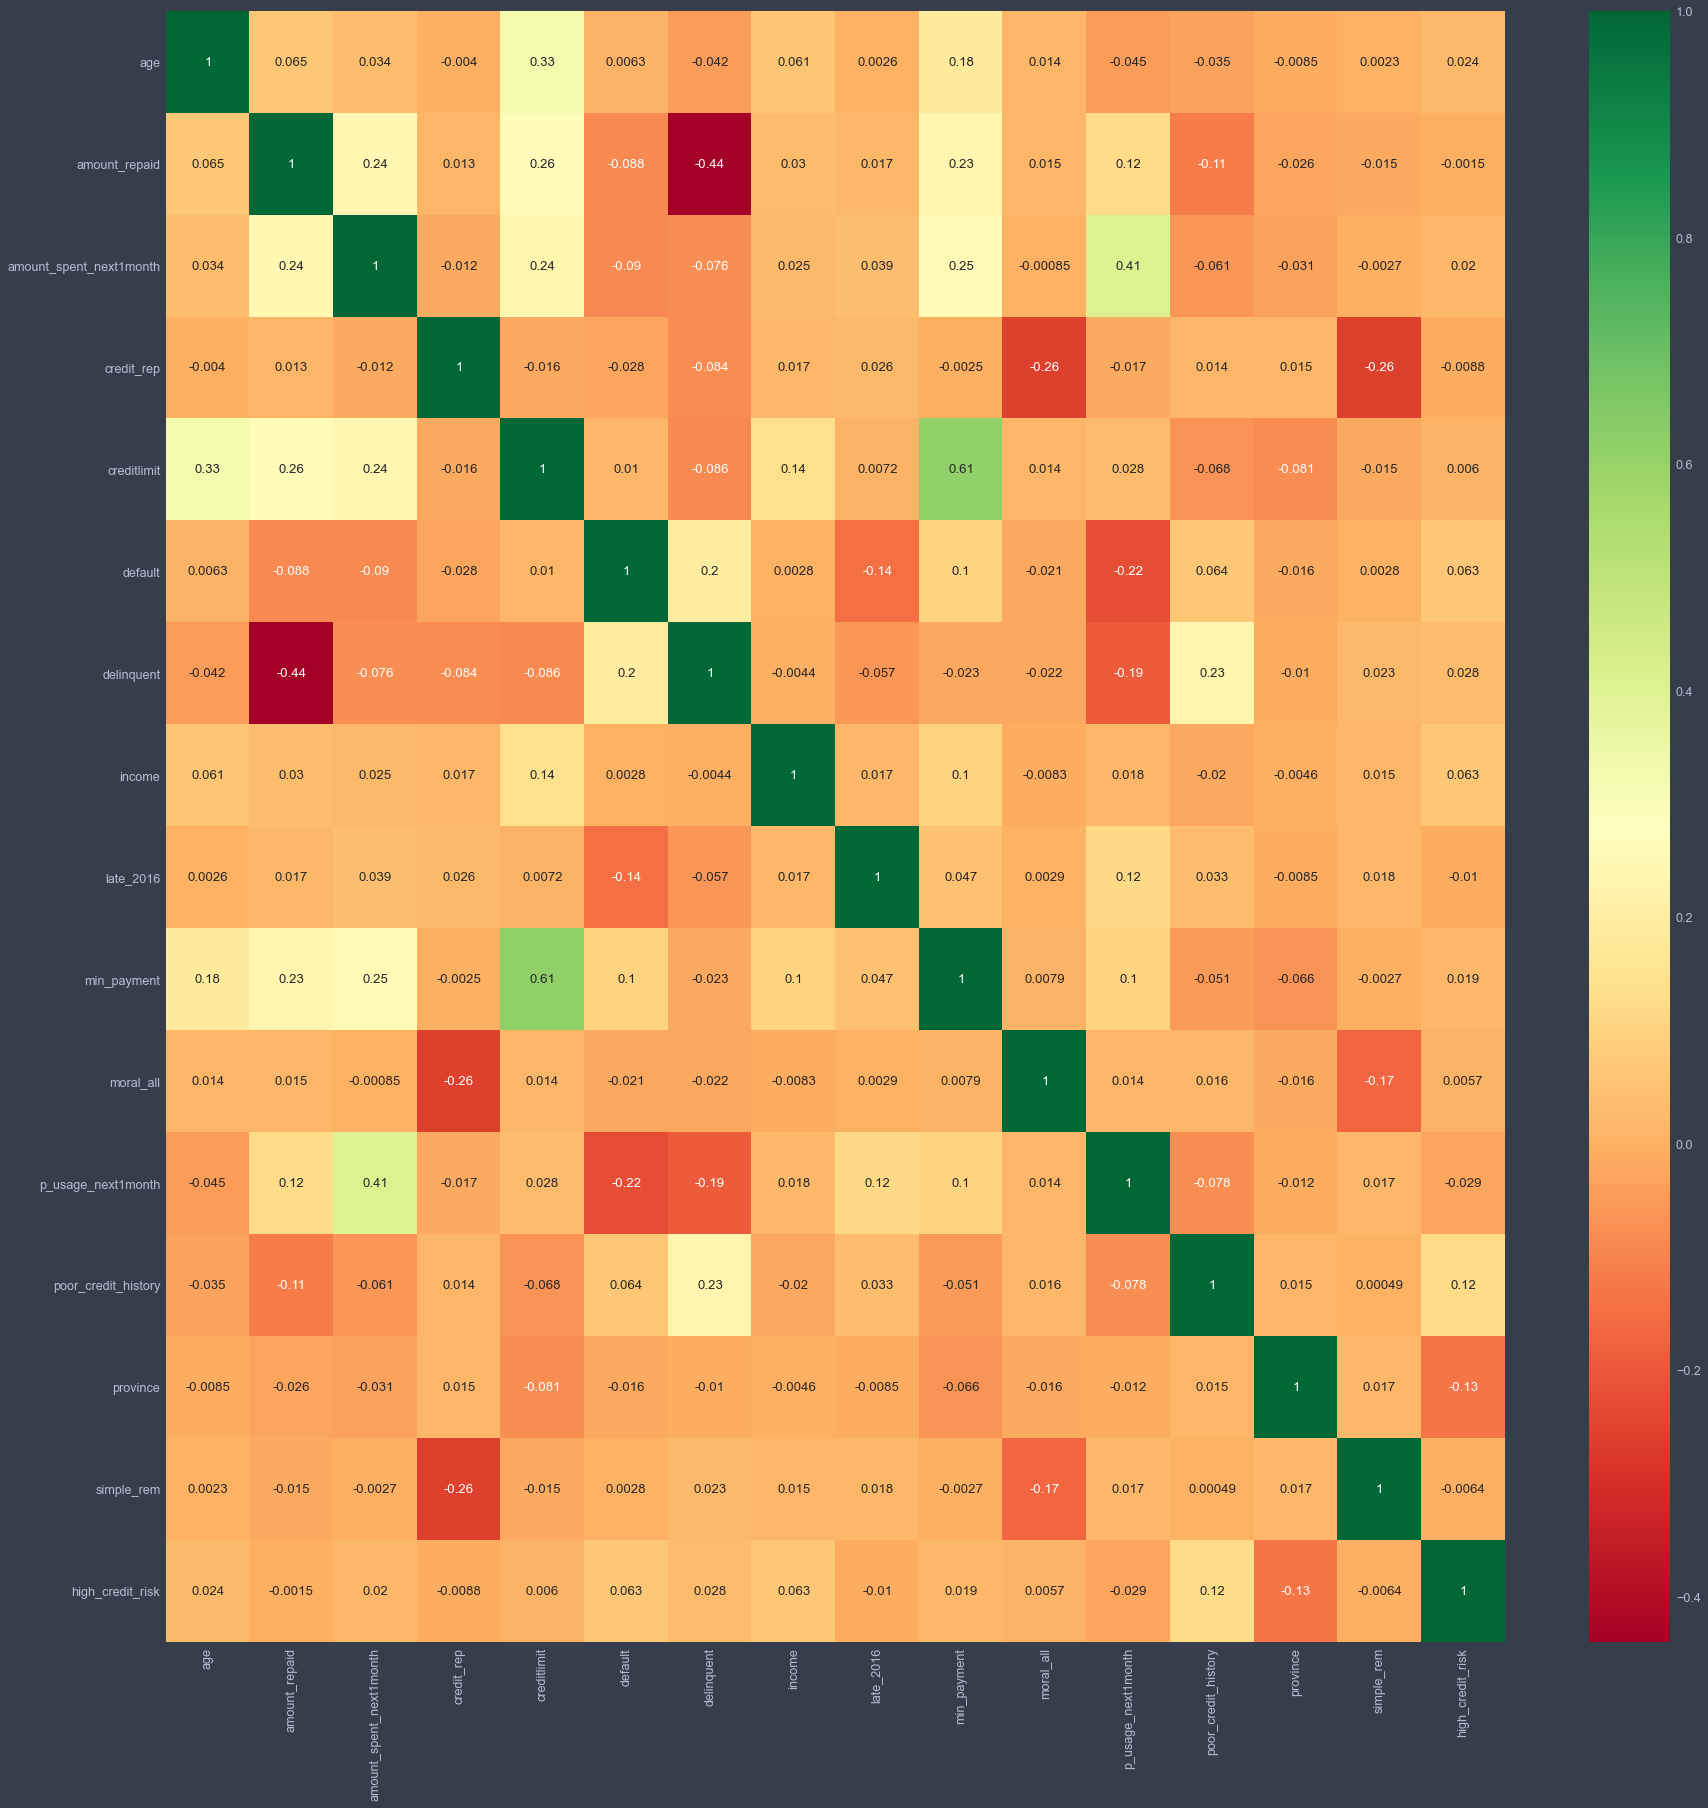

In [120]:
#jgn lupa drop sum,id
import seaborn as sns
corrmat = df_credit.corr(method = 'pearson') #pandas

top_corr_features = corrmat.index
plt.figure(figsize=(30,30))

g=sns.heatmap(df_credit[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [121]:
df_credit_oh = pd.get_dummies(df_credit, columns = ['jk','treatment','province_name'])

In [122]:
df_credit_oh

,age,amount_repaid,amount_spent_next1month,credit_rep,creditlimit,default,delinquent,income,late_2016,min_payment,...,province_name_South Sulawesi,province_name_South Sumatra,province_name_Unknown,province_name_West Java,province_name_West Kalimantan,province_name_West Nusa Tenggara,province_name_West Papua,province_name_West Sulawesi,province_name_West Sumatra,province_name_Yogyakarta
0,40.250,484000,0,1,10.000,0,0,60.000,0,484000,...,0,0,0,0,0,0,0,0,0,0
1,56.000,0,0,0,10.000,1,1,60.000,0,575600,...,0,0,0,0,0,0,0,0,0,0
2,26.333,0,1745370,0,10.000,0,1,60.000,0,247400,...,0,0,0,0,0,0,0,0,0,0
3,32.333,1410000,1040000,0,10.000,0,0,60.000,0,1407956,...,0,0,0,0,0,0,0,0,0,0
4,41.000,600000,0,1,10.000,0,0,60.000,0,257600,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6974,46.917,0,0,0,10.000,0,1,60.000,0,426500,...,0,0,0,0,0,0,0,0,0,1
6975,41.917,0,0,0,10.000,0,1,60.000,0,226800,...,0,0,0,0,0,0,0,0,0,1
6976,52.417,0,7995000,0,40.000,0,1,600.000,0,3950600,...,0,0,0,0,0,0,0,0,0,1
6977,34.000,1100000,1025000,0,8.000,0,0,60.000,0,1029196,...,0,0,0,0,0,0,0,0,0,1


In [123]:
df_credit_oh.to_csv('e_comp_v1.csv', index = False)

# Modelling

In [14]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn import decomposition

#Bagging
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#Boosting
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV # for tuning parameter
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [15]:
df_credit_model = pd.read_csv('e_comp_v1.csv')

In [16]:
rob_scaler = RobustScaler()
df_credit_model['amount_repaid'] = rob_scaler.fit_transform(df_credit_model['amount_repaid'].values.reshape(-1,1))
df_credit_model['amount_spent_next1month'] = rob_scaler.fit_transform(df_credit_model['amount_spent_next1month'].values.reshape(-1,1))
df_credit_model['income'] = rob_scaler.fit_transform(df_credit_model['income'].values.reshape(-1,1))
df_credit_model['min_payment'] = rob_scaler.fit_transform(df_credit_model['amount_repaid'].values.reshape(-1,1))

In [17]:
df_credit_model

,age,amount_repaid,amount_spent_next1month,credit_rep,creditlimit,default,delinquent,income,late_2016,min_payment,...,province_name_South Sulawesi,province_name_South Sumatra,province_name_Unknown,province_name_West Java,province_name_West Kalimantan,province_name_West Nusa Tenggara,province_name_West Papua,province_name_West Sulawesi,province_name_West Sumatra,province_name_Yogyakarta
0,40.250,0.605,0.000,1,10.000,0,0,0.000,0,0.605,...,0,0,0,0,0,0,0,0,0,0
1,56.000,0.000,0.000,0,10.000,1,1,0.000,0,0.000,...,0,0,0,0,0,0,0,0,0,0
2,26.333,0.000,1.745,0,10.000,0,1,0.000,0,0.000,...,0,0,0,0,0,0,0,0,0,0
3,32.333,1.762,1.040,0,10.000,0,0,0.000,0,1.762,...,0,0,0,0,0,0,0,0,0,0
4,41.000,0.750,0.000,1,10.000,0,0,0.000,0,0.750,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6974,46.917,0.000,0.000,0,10.000,0,1,0.000,0,0.000,...,0,0,0,0,0,0,0,0,0,1
6975,41.917,0.000,0.000,0,10.000,0,1,0.000,0,0.000,...,0,0,0,0,0,0,0,0,0,1
6976,52.417,0.000,7.995,0,40.000,0,1,9.481,0,0.000,...,0,0,0,0,0,0,0,0,0,1
6977,34.000,1.375,1.025,0,8.000,0,0,0.000,0,1.375,...,0,0,0,0,0,0,0,0,0,1


In [18]:
y = df_credit_model['default']
df_credit_model.drop(['default'], axis=1, inplace=True)
X = df_credit_model.copy()

In [19]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 6544, 1: 435})


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5583, 56) (5583,) (1396, 56) (1396,)


In [21]:
sm = SMOTE(sampling_strategy=0.3, k_neighbors=5, random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [22]:
us = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
X_train, y_train = us.fit_sample(X_train, y_train)

In [194]:
counter = Counter(y_train)
print(counter)

Counter({0: 2618, 1: 1571})


In [195]:
ALGS = [
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42),ExtraTreesClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),RandomForestClassifier(random_state=42),
    # LogisticRegressionCV(),
#     MultinomialNB(),
    KNeighborsClassifier(),
    SVC(random_state=42),
    XGBClassifier(random_state=42),
    CatBoostClassifier(silent=True, random_state=42),
    LGBMClassifier(random_state=42)
    ]

ALGS_columns = ['Nama Algoritma', 'Parameter Algoritma', 'Rata-rata Makro F1']
ALGS_compare = pd.DataFrame(columns = ALGS_columns)

ALGS_predict = pd.DataFrame()
row_index = 0
for alg in ALGS:
    ALGS_name = alg.__class__.__name__
    ALGS_compare.loc[row_index, 'Nama Algoritma'] = ALGS_name
    ALGS_compare.loc[row_index, 'Parameter Algoritma'] = str(alg.get_params())

    cv_results = cross_validate(alg, X_train, y_train, cv=10, scoring=metrics.make_scorer(metrics.f1_score, average='macro'))
#     print(cv_results)
    ALGS_compare.loc[row_index, 'Rata-rata Makro F1'] = cv_results['test_score'].mean()
    
    alg.fit(X_train, y_train)
    ALGS_predict[ALGS_name] = alg.predict(X_train)
    
    row_index+=1

In [196]:
ALGS_compare.sort_values(by = ['Rata-rata Makro F1'], ascending = False, inplace = True)
ALGS_compare

,Nama Algoritma,Parameter Algoritma,Rata-rata Makro F1
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.888
9,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.885
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.884
8,CatBoostClassifier,"{'silent': True, 'random_state': 42}",0.881
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.879
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.868
7,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.867
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.860
5,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.796
6,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.691


In [197]:
ALGS_compare.to_csv('z.csv')

## Hyperparameter Tuning

In [31]:
def tuning(alg, hyperparams):
    grid = GridSearchCV(alg, param_grid=hyperparams, scoring=metrics.make_scorer(metrics.f1_score, average='macro'), 
                           cv=10)
    grid.fit(X_train, y_train)

    print(grid.best_score_)
    print(grid.best_params_)
    print(grid.best_estimator_)

In [32]:
def vis_cm(y_test,y_pred_val,title):
    """
    Show Confusion Matrix
    y_test = target label
    y_pred = predicted label
    title = title of confusion matrix
    """
    cm = metrics.confusion_matrix(y_test, y_pred_val)
    accuracy = np.trace(cm) / float(np.sum(cm))
    test_f1 = metrics.f1_score(y_test, y_pred_val,average='macro')
    print('Recall Non-default: {:.2f}%'.format(metrics.recall_score(y_test, y_pred_val, average="binary", pos_label=0)*100))
    print('Recall Default: {:.2f}%'.format(metrics.recall_score(y_test, y_pred_val, average="binary", pos_label=1)*100))
    print('Precision Non-default: {:.2f}%'.format(metrics.precision_score(y_test, y_pred_val, average="binary", pos_label=0)*100))
    print('Precision Default: {:.2f}%'.format(metrics.precision_score(y_test, y_pred_val, average="binary", pos_label=1)*100))

    misclass = 1 - accuracy

    # sns.set(font_scale=1.4) # for label size
    ax = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, linewidths=2, linecolor='black', fmt='g', cmap="Blues") # font size

    ax.set_xlabel('Predicted Label \nTest Accuracy={:0.4f}; Test Macro F1={:0.4f}'.format(accuracy, test_f1))
    ax.set_ylabel('True Label')
    ax.set_title('Confusion Matrix '+title)

    #static label agar tidak kurang
    labels=["Non-default", "Default"]
    ax.yaxis.set_ticklabels(labels)
    ax.xaxis.set_ticklabels(labels)

Random Forest

In [220]:
rf = RandomForestClassifier()
# Parameter's to search
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

tuning(rf, hyperparams)

0.8930316165826644
{'max_depth': None, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 75}
RandomForestClassifier(max_features=7, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=75)


In [23]:
rf = RandomForestClassifier(max_features=7, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=75)
rf.fit(X_train, y_train)
y_pred_val_rf = rf.predict(X_test)

Recall Non-default: 94.41%
Recall Default: 27.78%
Precision Non-default: 94.99%
Precision Default: 25.51%


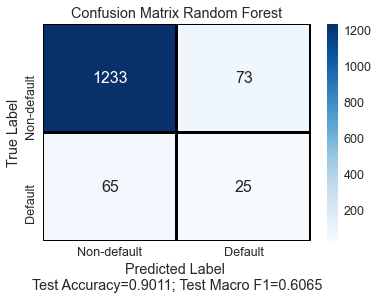

In [223]:
vis_cm(y_test,y_pred_val_rf, 'Random Forest')

LGBM

In [224]:
lgbm = LGBMClassifier() 

hyperparams = {
    'learning_rate': [0.001, 0.002, 0.005],
    'n_estimators': [40,60,80,100],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [42], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
}
tuning(lgbm, hyperparams)

0.8207196414828305
{'boosting_type': 'gbdt', 'colsample_bytree': 0.66, 'learning_rate': 0.005, 'n_estimators': 100, 'num_leaves': 16, 'objective': 'binary', 'random_state': 42, 'reg_alpha': 1, 'reg_lambda': 1.2, 'subsample': 0.7}
LGBMClassifier(colsample_bytree=0.66, learning_rate=0.005, num_leaves=16,
               objective='binary', random_state=42, reg_alpha=1, reg_lambda=1.2,
               subsample=0.7)


In [24]:
lgbm = LGBMClassifier(colsample_bytree=0.66, learning_rate=0.005, num_leaves=16,
               objective='binary', random_state=42, reg_alpha=1, reg_lambda=1.2,
               subsample=0.7)
lgbm.fit(X_train, y_train)
y_pred_val_lgbm = lgbm.predict(X_test)

Recall Non-default: 99.23%
Recall Default: 3.33%
Precision Non-default: 93.71%
Precision Default: 23.08%


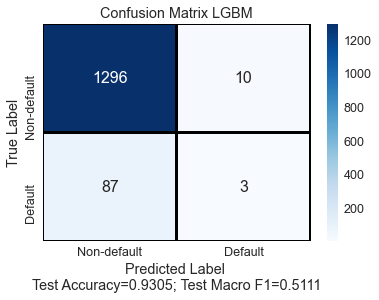

In [240]:
vis_cm(y_test,y_pred_val_lgbm, 'LGBM')

Bagging

In [228]:
bagging = BaggingClassifier() 

hyperparams = {
    'n_estimators': [40,60,80,100],
}
tuning(bagging, hyperparams)

0.8913522831076397
{'n_estimators': 40}
BaggingClassifier(n_estimators=40)


In [25]:
bagging = BaggingClassifier(n_estimators=40)
bagging.fit(X_train, y_train)
y_pred_val_bagging = bagging.predict(X_test)

Recall Non-default: 93.72%
Recall Default: 30.00%
Precision Non-default: 95.10%
Precision Default: 24.77%


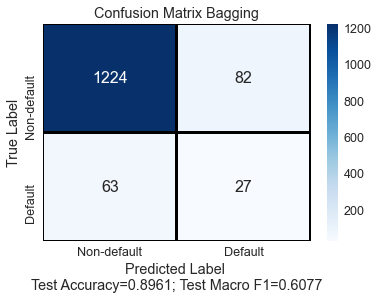

In [230]:
vis_cm(y_test,y_pred_val_bagging, 'Bagging')

## Feature Importance

Random Forest

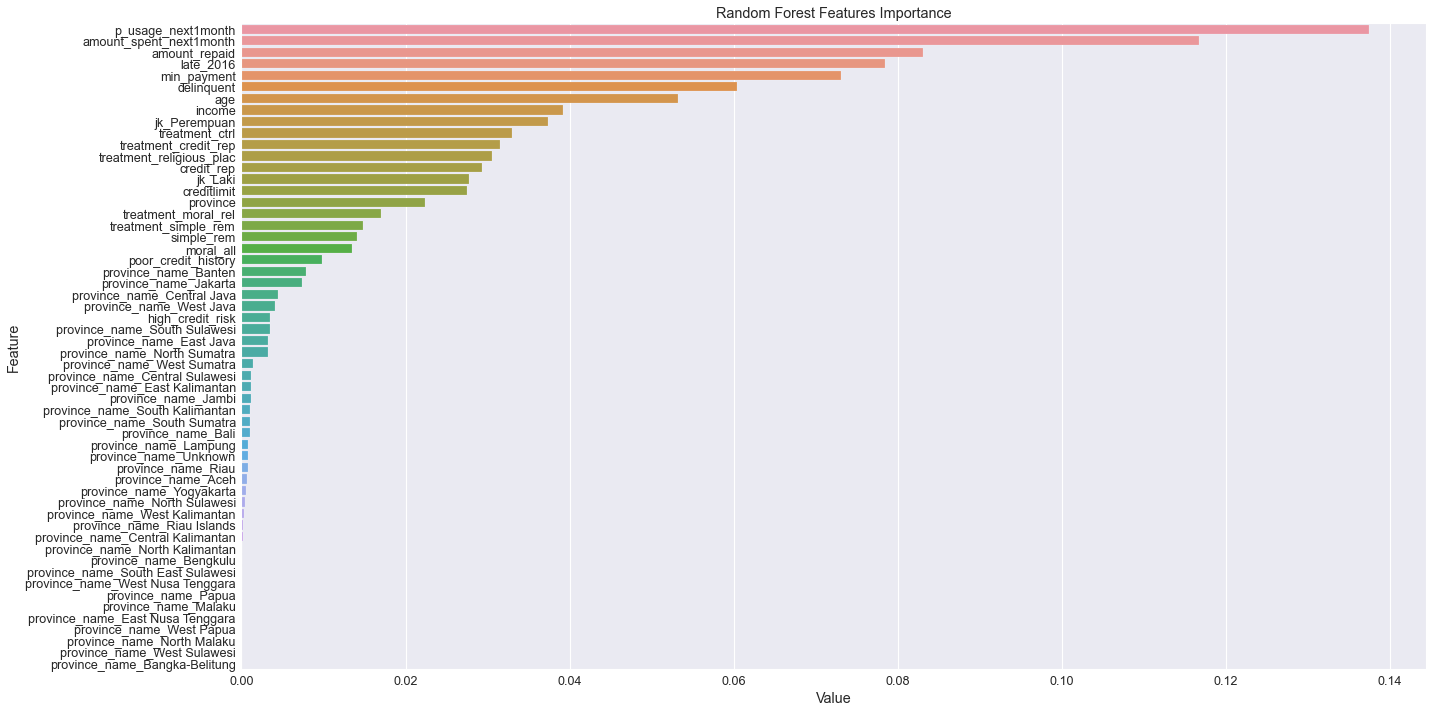

In [246]:
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Random Forest Features Importance')
plt.tight_layout()
plt.show()

In [276]:
df_fi_rf = pd.DataFrame(sorted(zip(rf.feature_importances_,X_train.columns)), columns=['Value','Feature'])
# df_fi_rf['Feature'][15:]
df_fi_rf.tail(15)

,Value,Feature
41,0.027,creditlimit
42,0.028,jk_Laki
43,0.029,credit_rep
44,0.031,treatment_religious_plac
45,0.031,treatment_credit_rep
46,0.033,treatment_ctrl
47,0.037,jk_Perempuan
48,0.039,income
49,0.053,age
50,0.060,delinquent


In [286]:
X_train_filter_fi_rf = X_train[['creditlimit','jk_Laki','credit_rep','treatment_religious_plac','treatment_credit_rep',
                               'treatment_ctrl','jk_Perempuan','income','age','delinquent','min_payment','late_2016',
                               'amount_repaid','amount_spent_next1month','p_usage_next1month']]
X_test_filter_fi_rf = X_test[['creditlimit','jk_Laki','credit_rep','treatment_religious_plac','treatment_credit_rep',
                               'treatment_ctrl','jk_Perempuan','income','age','delinquent','min_payment','late_2016',
                               'amount_repaid','amount_spent_next1month','p_usage_next1month']]

In [287]:
rf = RandomForestClassifier(max_features=7, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=75)
rf.fit(X_train_filter_fi_rf, y_train)
y_pred_val_rf_Fi = rf.predict(X_test_filter_fi_rf)

Recall Non-default: 89.05%
Recall Default: 41.11%
Precision Non-default: 95.64%
Precision Default: 20.56%


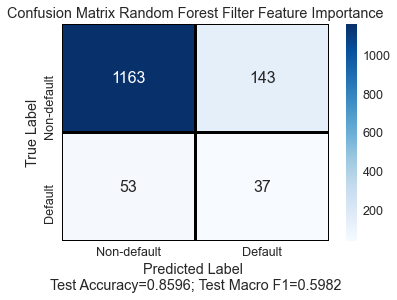

In [290]:
vis_cm(y_test,y_pred_val_rf_Fi, 'Random Forest Filter Feature Importance')

LGBM

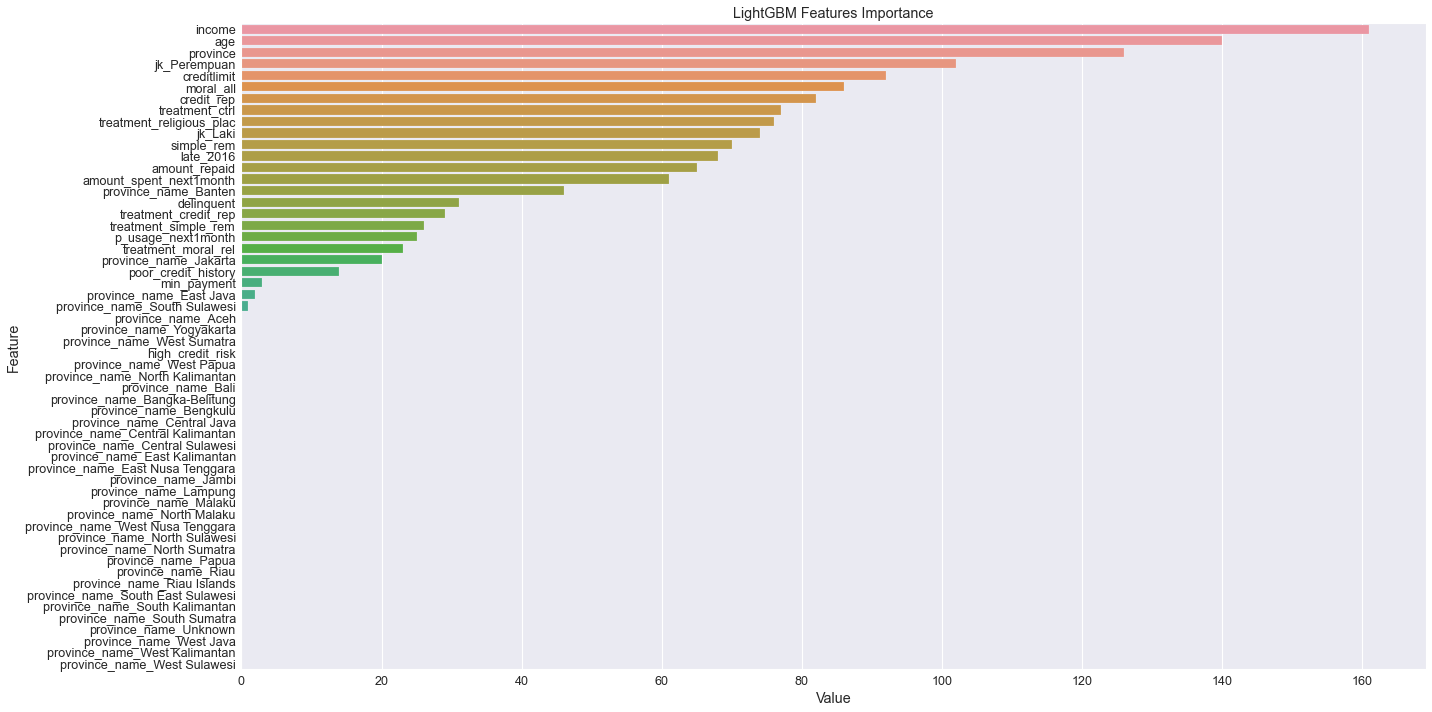

In [233]:
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features Importance')
plt.tight_layout()
plt.show()

In [291]:
df_fi_lgbm = pd.DataFrame(sorted(zip(lgbm.feature_importances_,X_train.columns)), columns=['Value','Feature'])
df_fi_lgbm.tail(15)

,Value,Feature
41,46,province_name_Banten
42,61,amount_spent_next1month
43,65,amount_repaid
44,68,late_2016
45,70,simple_rem
46,74,jk_Laki
47,76,treatment_religious_plac
48,77,treatment_ctrl
49,82,credit_rep
50,86,moral_all


In [292]:
X_train_filter_fi_lgbm = X_train[['province_name_Banten','amount_spent_next1month','amount_repaid','late_2016','age',
                               'simple_rem','jk_Laki','treatment_religious_plac','treatment_ctrl','credit_rep','moral_all','income',
                               'creditlimit','jk_Perempuan','province']]
X_test_filter_fi_lgbm = X_test[['province_name_Banten','amount_spent_next1month','amount_repaid','late_2016','age',
                               'simple_rem','jk_Laki','treatment_religious_plac','treatment_ctrl','credit_rep','moral_all','income',
                               'creditlimit','jk_Perempuan','province']]

In [294]:
lgbm = LGBMClassifier(colsample_bytree=0.66, learning_rate=0.005, num_leaves=16,
               objective='binary', random_state=42, reg_alpha=1, reg_lambda=1.2,
               subsample=0.7)
lgbm.fit(X_train_filter_fi_lgbm, y_train)
y_pred_val_lgbm = lgbm.predict(X_test_filter_fi_lgbm)

Recall Non-default: 100.00%
Recall Default: 0.00%
Precision Non-default: 93.55%
Precision Default: 0.00%


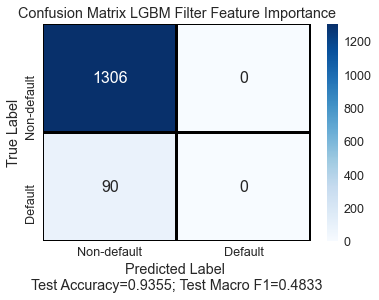

In [296]:
vis_cm(y_test,y_pred_val_lgbm, 'LGBM Filter Feature Importance')

## Voting

In [77]:
np.random.seed(42)
grid_soft = VotingClassifier(estimators = [('Random Forest', rf), 
                                           ('Bagging', bagging),
                                           ('LGBM', lgbm)
                                          ], voting = 'soft')
grid_soft.fit(X_train, y_train)
y_pred_val_soft_voting = grid_soft.predict(X_test)

Recall Non-default: 95.33%
Recall Default: 26.67%
Precision Non-default: 94.97%
Precision Default: 28.24%


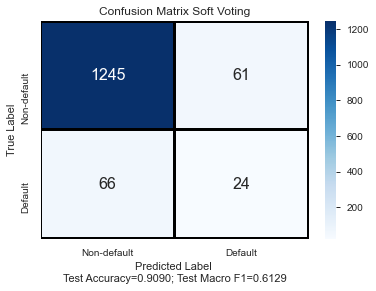

In [79]:
vis_cm(y_test,y_pred_val_soft_voting, 'Soft Voting')

In [85]:
np.random.seed(42)
grid_hard = VotingClassifier(estimators = [('Random Forest', rf), 
                                           ('Bagging', bagging),
                                           ('LGBM', lgbm)
                                          ], voting = 'hard')
grid_hard.fit(X_train, y_train)
y_pred_val_hard_voting = grid_hard.predict(X_test)

Recall Non-default: 95.71%
Recall Default: 21.11%
Precision Non-default: 94.63%
Precision Default: 25.33%


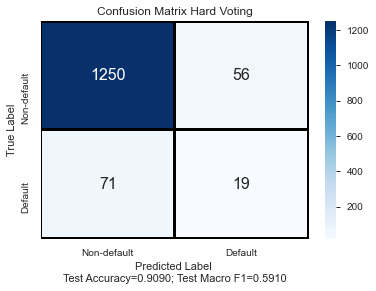

In [86]:
vis_cm(y_test,y_pred_val_hard_voting, 'Hard Voting')